Link del video:https://youtu.be/UycPuw2XDMg

##**Introducción**


El problema que se trata en este proyecto no es uno nuevo. La necesidad de transmitir mensajes entre un emisor y receptor conservando la integridad y confidencialidad del mismo es casi tan antigua como las primeras civilizaciones humanas. Uno de los ejemplos más antiguos que se tienen de mensajes encriptados es el uso de la escitala.

Este era un bastón de madera con un determinado grosor. El mensaje a decifrar se encontraba escrito de forma vertical en una cinta, que al enrollarla en el bastón, ponía las letras en la posicion correcta (dependía del grosor de la escitala), permitiendo la lectura del mensaje horizontalmente.

Hoy en día, esto se clasifica como un método criptográfico de transposición, y no falta mucha creatividad para vulnerarlo y revelar los mensajes encriptados con este método. El problema toma un giro interesante con la llegada de la computadora moderna, pues las guerras mundiales dieron paso al uso de estas máquinas tanto para esconder la información como para intentar decifrar los mensajes del enemigo.

Durante los años cincuentas y sesentas, se proponen y aplican diferentes modelos de encriptación con algoritmos varios, pero en 1969 se expone el algoritmo Diffie-Hellman, que propone un intercambio de mensajes cifrados sin tener que intercambiar ninguna clave en el proceso.

El mayor problema con esta idea es que ambas partes involucradas tienen que ponerse de acuerdo al mismo tiempo para que se pueda generar una clave. Diffie también teorizó un sistema con dos claves que no dependadn de la otra, una para cifrar y otra para descifrar. Esto marca la primera idea que luego da lugar al nacimiento del algoritmo RSA.

Para aportar al problema de mantener la seguridad y privacidad de la información, a continuación se plante una implementación explicada del algoritmo RSA.



##**Materiales y métodos**



El  objetivo de este proyecto es lograr una implementación del algoritmo RSA en python, codificando y descodificando un mensaje de una parte A a una parte B,
incluyendo breves explicaciones sobre los mecanismos tras este algoritmo.

Primero, se necesitan números primos que funcionen como las claves p y q. La seguridad que da el algoritmo RSA está construido sobre el desafío matemático de
factorizar el producto de dos números primos grandes, p y q. Se dice que N=p*q, siendo N el largo de la clave RSA, que entre más larga, es más segura.
Se importara randrange de random para luego probar si son primos. Nos aseguramos de que solo retorne resultados de n-bits, además de impares.


In [ ]:

from random import randrange

def generate_n_bit_odd(n: int):
    #Genera un número aleatorio en el rango [2**(n-1)+1, 2**n-1]
    assert n > 1
    return randrange(2 ** (n - 1) + 1, 2 ** n, 2)


Para hacer el test de primalidad más eficiente, se prueba primero contra los primeros 50 números primos luego del 2.

In [ ]:

first_50= [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149,
151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233 ]

def get_lowlevel_prime(n):
    #Genera un posible primo no divisible entre los primeros 50 primos
    while True:

        c = generate_n_bit_odd(n)

        for divisor in first_50:
            if c % divisor == 0 and divisor ** 2 <= c:
                break
        else:
            return c

La siguiente prueba de primalidad se conoce como el test de primalidad de Miller-Rabin, que utiliza el pequeño teorema de Fermat para determinar
probabilisticamente si un número es compueto o posiblemente es un primo. Funciona de la siguiente forma:

Por el pequeño teorema de Fermat, si a no es múltiplo de un número primo n, se tiene que $a^{n-1}≡1 mod(n)$. Entonces si $n>2, n-1$ es un número par expresado de la forma $2^{s}*d$, donde s y d son positivos y $d$ es impar; Implicando $a^{2^{s}*d} ≡1 mod(n)$.

Si al lado izquierdo de la ecuación se le aplica raiz cuadrada y módulo, se obtiene $1$ o $-1^{2}$. Si se obtiene 1, entonces $a^{2^{r}d} ≡ -1 mod(n)$, donde r es un número entre $[0,s-1]$. De lo contario, si no se obtiene un 1, entonces $a^{d} ≡ 1 mod(n)$. Entonces, si n es un número primo mayor a 2, alguna de las afirmaciones debe ser correcta.

Si se encuentra un $a$ que para cualquier $0≤r≤s-1$ que satisfaga las ecuaciones $a^{2^{r}d} ≠ -1 mod(n)$ y $a^{d} ≠ 1 mod(n)$,entonces n no debe ser un número primo.

Para probar un número n, luego de calcular los valores de s y d, se escoje una base a aleatoriamente para probar ambas ecuaciones iterativamente.
 Entre más rondas de repetición, es menor el margen de error en el resultado.

In [ ]:

 def miller_rabin_primality_check(n, k=20):
    '''Test de primalidad de Miller-Rabin Primality Test de un
    número n con k rondas '''

    assert n > 3
    if n % 2 == 0:
        return False

    s, d = 0, n - 1
    while d % 2 == 0:
        d >>= 1
        s += 1

    for _ in range(k):
        a = randrange(2, n - 1)
        x = pow(a, d, n)

        if x == 1 or x == n - 1:
            continue

        for _ in range(s):
            x = pow(x, 2, n)
            if x == n - 1:
                break
        else:
            # Si falla el test, n es compuesto
            return False

    # Si pa el test, es bastante probable que sea un primo
    return True

Juntando el generador de números y los test de primalidad, se obtiene:


In [ ]:
def get_random_prime(num_bits):
    #Genera un primo aleatorio
    while True:
        pp = get_lowlevel_prime(num_bits)
        if miller_rabin_primality_check(pp):
            return pp

El siguiente paso consiste en crear un implementación del algoritmo de Euclides para encontrar el MCD y el MCM.

In [ ]:
def mcd(a, b):
    while b:
        a, b = b, a % b
    return a

def mcm(a, b):
    return a // mcd(a, b) * b

El siguiente paso consite en buscar un MCD, s y t tales que se satisface la identidad de Bézout: $mcd(a,b) = a*s + b*t$.

In [ ]:
def exmcd(a, b):
    #Algoritmo de Euclides para identidad de Bézout
    old_s, s = 1, 0
    old_t, t = 0, 1
    while b:
        q = a // b
        s, old_s = old_s - q * s, s
        t, old_t = old_t - q * t, t
        a, b = b, a % b
    return a, old_s, old_t

También se requiere hallar un inverso multiplicativo x (el más pequeño posible) de un número e con respecto al módulo m. Por la identidad de Bézout se tiene que $a*x + b*y = mcd(a,b)$, substituyendo $a=e$ y $b=m=λ(N)$ porque $e$ y $λ(N)$ son coprimos ($(d*e)modλ(N)=1$):

$e*x+m*y=1$

In [ ]:
def invmod(e, m):
    g, x, y = exmcd(e, m)
    assert g == 1

    # El inverso multiplicativo de e es x.
    if x < 0:
        x += m
    return x

Además de la función para el inverso multiplicativo, se definen funciones para manipular losmensajes como datos int y byte.

In [ ]:
def int_to_bytes(x: int) -> bytes:
    return x.to_bytes((x.bit_length() + 7) // 8, 'big')

def int_from_bytes(xbytes: bytes) -> int:
    return int.from_bytes(xbytes, 'big')

Para usar los métodos, se va a implementar una clase RSA

In [ ]:
class RSA:
    """Implements the RSA public key encryption/decryption with default
    exponent 65537 and default key size 2048"""
    key_length=2048
    def __init__(self, key_length,
                 exponent=65537):
        self.e = exponent
        t = 0
        p = q = 2

        while mcd(self.e, t) != 1:
            p = get_random_prime(key_length // 2)
            q = get_random_prime(key_length // 2)
            t = mcm(p - 1, q - 1)

        self.n = p * q
        self.d = invmod(self.e, t)

    def encrypt(self, binary_data: bytes):
        int_data = int_from_bytes(binary_data)
        return pow(int_data, self.e, self.n)

    def decrypt(self, encrypted_int_data: int):
        int_data = pow(encrypted_int_data, self.d, self.n)
        return int_to_bytes(int_data)



Eso finaliza el algoritmo. Para usarlo, se crea un objeto RSA (emisor) y el mensaje, para posteriormente usar encrypt y decript

#**Resultados**

Se revisará el desempeño del algoritmo usando secuencias aleatorias y midiendo el tiempo que toma el algoritmo en manipularlas.

In [ ]:
emisor = RSA(512, 3)
msg = b'Mensaje '
receptor = emisor.encrypt(msg)
assert emisor.decrypt(receptor) == msg
print("El mensaje sin encriptar es:")
print(msg)
print("El mensaje encriptado es:")
print(receptor)


El mensaje sin encriptar es:
b'Mensaje '
El mensaje encriptado es:
173459649905336512585932175283884917367625524476357935104


In [ ]:
from os import urandom
from timeit import timeit

def decrypt_norm(tester, ctxt: bytes, msg: bytes):
    ptxt = tester.decrypt(ctxt)
    assert ptxt == msg

Probamos imprimiendo el tamaño de la llave y en que mometo de la ejecución se logra encriptar

In [ ]:

for klen in [512, 1024, 2048, 3072, 4096]:
    rpt = int(klen ** 0.5)
    obj = RSA(klen,65537)
    t_n = t_f = 0
    for _ in range(2):
        mg = urandom(int(klen/16))
        ct = obj.encrypt(mg)
        t_n += timeit(lambda: decrypt_norm(obj, ct, mg), number=rpt)

        print("Key size "+str(klen)+"     time  "+str(t_n))

Key size 512     time  0.028519888000005267
Key size 512     time  0.05780915200000436
Key size 1024     time  0.2375849530000096
Key size 1024     time  0.47478948900001683
Key size 2048     time  1.9221120670000005
Key size 2048     time  3.7256511089999975
Key size 3072     time  5.684736900000004
Key size 3072     time  11.717148471000016
Key size 4096     time  15.759819037
Key size 4096     time  31.507849910999994


#**Conclusiones**


Esta implementación es bastante básica, e ignora concientemente pasos "tradicionales" del algoritmo RSA para encriptar información de forma más segura, además de trabajar con claves más pequeñas que las necesarias en el mundo de la ciberseguridad.

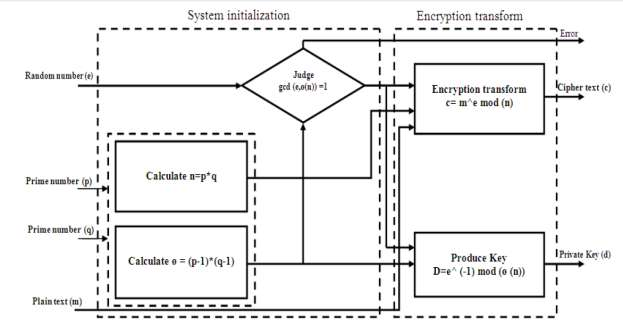
Design and Implementation of RSA Algorithm using FPGA - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Block-diagram-of-RSA-encryption-algorithms-IV-Design-of-the-RSA-Encryption-Algorithm-The_fig1_282249995

Obviando lo anterior, el algoritmo RSA ha ganado su reputación durante las últimas décadas gracias a su ingenioso mecanismo para encriptar información basado en números primos y aritmética modular, pues factorizar un número grande como producto de dos primos es un trabajo largo y laborioso, sobretodo si se considera que los mensajes de mayor confidencialidad usan primos de hasta 200 dígitos.

En los resultados obtenidos, midiendo la velocidad y tamaño de la clave, nos damos cuanta que a mayor tamaño, el algoritmo toma más tiempo encriptando; relacionando una clave con más dígitos a una mayor seguridad.

También es bastante beneficioso que este algoritmo sea asimétrico, pues es dificilmente reversible y tener una clave tanto privada como personal hace que no se detenga el proceso aunque falte la clave privada de un emisor o receptor.

#Referencias:
Urgellés, J. G. (2018). Un secreto a voces: la criptografía de clave pública. In Matemáticas y códigos secretos. essay, RBA Libros.

Zixi. (2023, March 11). Implement textbook RSA in python. PacketMania. https://www.packetmania.net/en/2022/01/22/Python-Textbook-RSA/#performance-tests

